<a href="https://colab.research.google.com/github/Nasomjaiwilawan/Assignment_1_Wilawan/blob/main/Assignment_1_Wilawan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment_1_Wilawan

## Dataset

In [1]:
import pandas as pd
header = ["Number_of_times_pregnant", #Feature_1
          "Plasma_glucose_concentration_a_2-hours_in_an_oral_glucose_tolerance_test", #Feature_2
          "Diastolic_blood_pressure", #Feature_3
          "Triceps_skin_fold_thickness", #Feature_4
          "2-Hour_serum_insulin", #Feature_5
          "Body_mass_index", #Feature_6
          "Diabetes_pedigree_function", #Feature_7
          "Age", #Feature_8
          "Class_variable"] #Labels or Class
df = pd.read_csv("pima-indians-diabetes.csv", names=header)
df

,Number_of_times_pregnant,Plasma_glucose_concentration_a_2-hours_in_an_oral_glucose_tolerance_test,Diastolic_blood_pressure,Triceps_skin_fold_thickness,2-Hour_serum_insulin,Body_mass_index,Diabetes_pedigree_function,Age,Class_variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## RFE (Logistic Regression)

In [3]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
X = df.drop("Class_variable",axis=1)
y = df["Class_variable"]
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=4)
fit = rfe.fit(X, y)

# Create DataFrame for Summary
print("Number Features: %s" % (fit.n_features_))
feature_names = [f"Feature_{i+1}" for i in range(X.shape[1])]
df_results = pd.DataFrame({
    "Feature_Name": feature_names,
    "Feature_Ranking": fit.ranking_,
    "Select_Feature": fit.support_})
print(df_results)

Number Features: 4
  Feature_Name  Feature_Ranking  Select_Feature
0    Feature_1                1            True
1    Feature_2                1            True
2    Feature_3                3           False
3    Feature_4                4           False
4    Feature_5                5           False
5    Feature_6                1            True
6    Feature_7                1            True
7    Feature_8                2           False


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Statistic Feature Selection (ANOVA)

Original Number of Features: 8
Selected Features: 4
  Feature_name  F-statistic  Feature_Ranking  Select_Feature
0    Feature_1    39.670227                4            True
1    Feature_2   213.161752                1            True
2    Feature_3     3.256950                8           False
3    Feature_4     4.304381                7           False
4    Feature_5    13.281108                6           False
5    Feature_6    71.772072                2            True
6    Feature_7    23.871300                5           False
7    Feature_8    46.140611                3            True


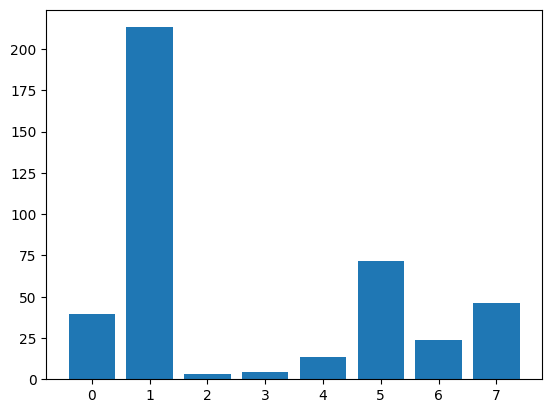

In [6]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot
X = df.drop("Class_variable",axis=1)
y = df["Class_variable"]
feature_selection = SelectKBest(score_func=f_classif, k=4)
X_selected = feature_selection.fit_transform(X, y)

# Create DataFrame for Summary
print("Original Number of Features:", X.shape[1])
print("Selected Features:", X_selected.shape[1])
feature_names = [f"Feature_{i+1}" for i in range(X.shape[1])]
df_results = pd.DataFrame({
    "Feature_name": feature_names,
    "F-statistic": feature_selection.scores_})
df_results["Feature_Ranking"] = df_results["F-statistic"].rank(ascending=False).astype(int)
df_results["Select_Feature"] = df_results["Feature_Ranking"] <= X_selected.shape[1]
print(df_results)

pyplot.bar([x for x in range(len(feature_selection.scores_))], feature_selection.scores_)
pyplot.show()

## Feature Importance (Decision Tree)

  Feature_name     Score  Feature_Ranking  Select_Feature
0    Feature_1  0.055952                6           False
1    Feature_2  0.319666                1            True
2    Feature_3  0.071835                5           False
3    Feature_4  0.029703                8           False
4    Feature_5  0.034876                7           False
5    Feature_6  0.236092                2            True
6    Feature_7  0.136281                3            True
7    Feature_8  0.115596                4            True


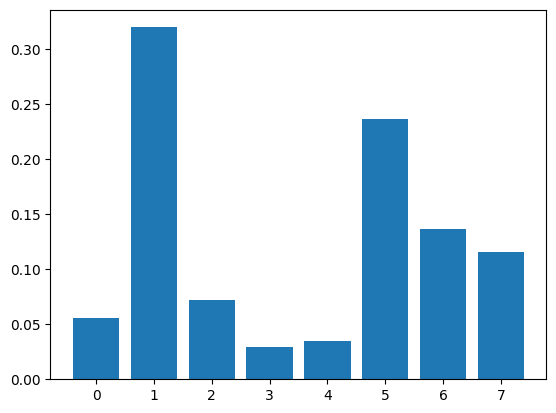

In [5]:
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
X = df.drop("Class_variable",axis=1)
y = df["Class_variable"]
model = DecisionTreeRegressor()
model.fit(X, y)
feature_importance = model.feature_importances_

# Create DataFrame for Summary
feature_names = [f"Feature_{i+1}" for i in range(X.shape[1])]
df_results = pd.DataFrame({
    "Feature_name": feature_names,
    "Score": feature_importance})
df_results["Feature_Ranking"] = df_results["Score"].rank(ascending=False).astype(int)
df_results["Select_Feature"] = df_results["Feature_Ranking"] <= 4
print(df_results)

pyplot.bar([x for x in range(len(feature_importance))], feature_importance)
pyplot.show()